In [21]:
install.packages("readxl")
install.packages("dplyr")
install.packages("stargazer")

library(readxl)
library(dplyr)
library(stargazer)

# Load the data
data <- read_excel("merged.xlsx")

# Filter and preprocess the data
filtered_data <- data %>%
  filter(LOCATION %in% c("FRA", "GBR")) %>%
  mutate(
    TREATMENT = ifelse(LOCATION == "FRA", 1, 0),  # France is treated
    POST = ifelse(TIME >= 2009, 1, 0),            # Post-2008 period
    TREATMENT_POST = TREATMENT * POST,            # Interaction term
    LOG_GDP = log(GDP)                            # Log transformation of GDP so that its in percentage points 
  )
# Drop rows with missing GDP or zero GDP
filtered_data <- filtered_data %>% filter(!is.na(LOG_GDP) & GDP > 0)
# Model 1: Without control variables 
model1 <- lm(LOG_GDP ~ TREATMENT + POST + TREATMENT_POST, data = filtered_data)
# Model 2: Add POP as a control variable 
model2 <- lm(LOG_GDP ~ TREATMENT + POST + TREATMENT_POST + POP, data = filtered_data)
# Model 3: Add all available control variables 
model3 <- lm(LOG_GDP ~ TREATMENT + POST + TREATMENT_POST + POP + CPI + HUR + GGDEBT, 
             data = filtered_data)
# Export regression results to an HTML file
stargazer(model1, model2, model3, 
          type = "html", 
          out = "regression_results_france_uk.html",  # Specify the output file name
          title = "Difference-in-Differences Analysis: Effect of Eurozone Membership on Financial Resilience, UK v France",
          dep.var.labels = "Log(GDP)",
          covariate.labels = c("Treatment (France)", "Post-2008", "Interaction (Treatment x Post)",
                               "Population", "FDI Flow", "CPI", "Unemployment Rate", "Government Debt"),
          omit.stat = c("f", "ser"), 
          digits = 5)
cat("Regression table saved as 'regression_results_france_uk.html' in your working directory.\n")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




<table style="text-align:center"><caption><strong>Difference-in-Differences Analysis: Effect of Eurozone Membership on Financial Resilience, UK v France</strong></caption>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">Log(GDP)</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Treatment (France)</td><td>-0.00344</td><td>-0.24648<sup>***</sup></td><td>-0.21277<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.06805)</td><td>(0.02252)</td><td>(0.04575)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Post-2008</td><td>0.44470<su

In [22]:
library(readxl)
library(dplyr)
library(stargazer)

# Load the data
data <- read_excel("merged.xlsx")

# Filter and preprocess the data
filtered_data <- data %>%
  filter(LOCATION %in% c("ESP", "SWE")) %>%  # Spain and Sweden
  mutate(
    TREATMENT = ifelse(LOCATION == "ESP", 1, 0),  # Spain is treated
    POST = ifelse(TIME >= 2009, 1, 0),            # Post-2008 period
    TREATMENT_POST = TREATMENT * POST,            # Interaction term
    LOG_GDP = log(GDP)                            # Log transformation of GDP to make it into percentage point terms
  )

# Drop rows with missing GDP or zero/negative GDP
filtered_data <- filtered_data %>% filter(!is.na(LOG_GDP) & GDP > 0)

# Model 1: Without control variables 
model1 <- lm(LOG_GDP ~ TREATMENT + POST + TREATMENT_POST, data = filtered_data)

# Model 2: Add FDI Flow as a control variable 
model2 <- lm(LOG_GDP ~ TREATMENT + POST + TREATMENT_POST + POP, data = filtered_data)

# Model 3: Add all available control variables 
model3 <- lm(LOG_GDP ~ TREATMENT + POST + TREATMENT_POST + POP + CPI + HUR + GGDEBT, 
             data = filtered_data)

# Export regression results to an HTML file
stargazer(model1, model2, model3, 
          type = "html", 
          out = "regression_results_spain_sweden.html",  # Output file name
          title = "Difference-in-Differences Analysis: Effect of Eurozone Membership on Financial Resilience, Spain v Sweden",
          dep.var.labels = "Log(GDP)",
          covariate.labels = c("Treatment (Spain)", "Post-2008", "Interaction (Treatment x Post)",
                               "Population", "FDI Flow", "CPI", "Unemployment Rate", "Government Debt"),
          omit.stat = c("f", "ser"), 
          digits = 5)

cat("Regression table saved as 'regression_results_spain_sweden.html' in your working directory.\n")


<table style="text-align:center"><caption><strong>Difference-in-Differences Analysis: Effect of Eurozone Membership on Financial Resilience, Spain v Sweden</strong></caption>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">Log(GDP)</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Treatment (Spain)</td><td>1.29633<sup>***</sup></td><td>-3.30425<sup>***</sup></td><td>-2.49275<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.07694)</td><td>(0.57558)</td><td>(0.58184)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Post-2008</td

In [23]:
markdown_content <- "# The Eurozone's Monetary Policy and Economic Resilience: A Post-2008 Analysis
This project examines the impact of the Eurozone's monetary policies on the economic resilience of its member states following the 2008 financial crisis.

## MPA2065 Class Project
**Team Members:**
- Kuma Kumsa
- Thomas Sfinarolakis
- Karma Hayek

## Objective
To analyze the differences in economic recovery between Eurozone and non-Eurozone countries using the Difference-in-Differences (DiD) methodology.

## Methodology
- A dataset from the OECD Data Explorer was used, covering GDP, population, inflation (CPI), unemployment (HUR), and government debt (GGDEBT).
- Difference-in-Differences (DiD) analysis was conducted, comparing:
  - **Spain (Eurozone) vs. Sweden (Non-Eurozone)**
  - **France (Eurozone) vs. UK (Non-Eurozone)**

## Key Results
- France showed a positive economic recovery due to Eurozone membership.
- Spain’s recovery was constrained compared to Sweden due to limited monetary policy flexibility.

## Tools and Data Sources
- **Tools Used:** R (Jupyter Notebook), ggplot2 and stargazer.
- **Data Source:** OECD Data Explorer (https://data.oecd.org).

## License
This project is for academic purposes as part of the MPA2065 class and is not licensed for commercial use.
"

writeLines(markdown_content, "README.md")
getwd()

[1] "/home/jovyan/Final Project"

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



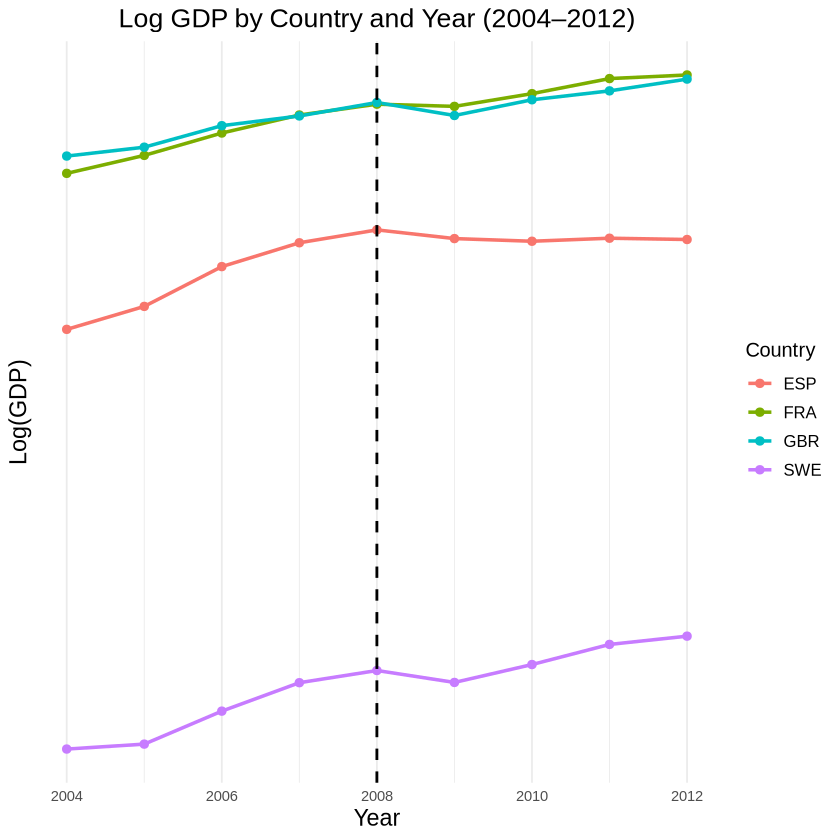

In [24]:
# Filter and preprocess the data for the UK, France, Sweden, and Spain
filtered_data <- data %>%
  filter(LOCATION %in% c("FRA", "GBR", "SWE", "ESP"), TIME >= 2004 & TIME <= 2012) %>%
  mutate(
    LOG_GDP = log(GDP)
  ) %>%
  filter(!is.na(LOG_GDP) & GDP > 0)

# Creates the line chart
install.packages("ggplot2")
library(ggplot2)
ggplot(data = filtered_data, aes(x = TIME, y = LOG_GDP, color = LOCATION, group = LOCATION)) +
  geom_line(size = 1) + 
  geom_point(size = 2) + 
  geom_vline(xintercept = 2008, linetype = "dashed", color = "black", size = 0.8) +  # Vertical dashed line at 2008
  scale_y_continuous(breaks = seq(10, max(filtered_data$LOG_GDP, na.rm = TRUE), by = 10)) +  
  labs(
    title = "Log GDP by Country and Year (2004–2012)",
    x = "Year",
    y = "Log(GDP)",
    color = "Country"
  ) +
  theme_minimal() +  
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),  
    axis.title = element_text(size = 14),             
    legend.title = element_text(size = 12),           
    legend.text = element_text(size = 10)              
  )